# Primeiros passos com o aprendizado de máquina Conceitos e técnicas clássicas parte 2

## Parte Prática

In [271]:
import pandas as pd
from pandas.plotting import parallel_coordinates 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB  
from sklearn.feature_extraction.text import CountVectorizer

In [272]:
df = pd.read_csv("pokemon_dataset.csv")
df

,isPokemon,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,1,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,1,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,1,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,1,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,1,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,1,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   isPokemon   800 non-null    int64 
 1   #           800 non-null    int64 
 2   Name        800 non-null    object
 3   Type 1      800 non-null    object
 4   Type 2      414 non-null    object
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [274]:
df.describe()

,isPokemon,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,1.0,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,0.0,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,1.0,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,1.0,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,1.0,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,1.0,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [275]:
#grafico de barras de ataque
attack_by_type = df.groupby("type1")["attack"].mean()

attack_by_type.plot(kind="bar", figsize=(8,6), color="red")
plt.xlabel("Média de Attack")
plt.ylabel("Tipo")
plt.title("Média de Attack por Tipo de Pokémon")
plt.show()

KeyError: 'type1'

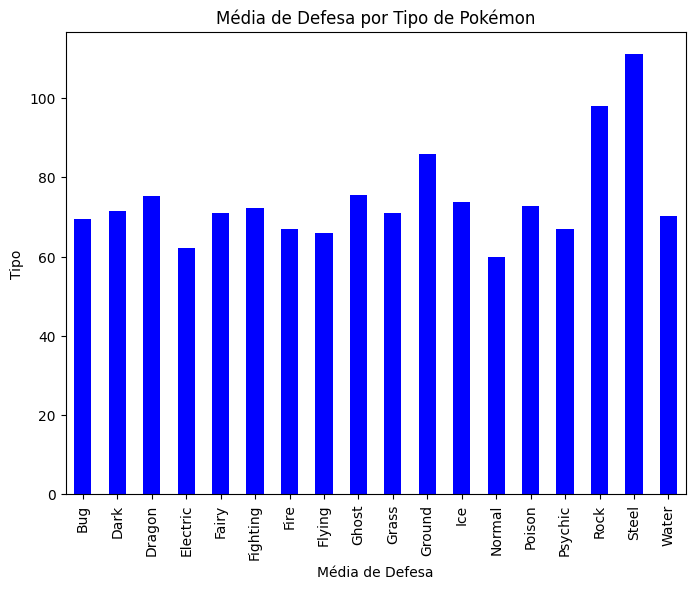

In [ ]:
#grafico de barras de defesa
defense_by_type = df.groupby("type1")["defense"].mean()

defense_by_type.plot(kind="bar", figsize=(8,6), color="blue")
plt.xlabel("Média de Defesa")
plt.ylabel("Tipo")
plt.title("Média de Defesa por Tipo de Pokémon")
plt.show()

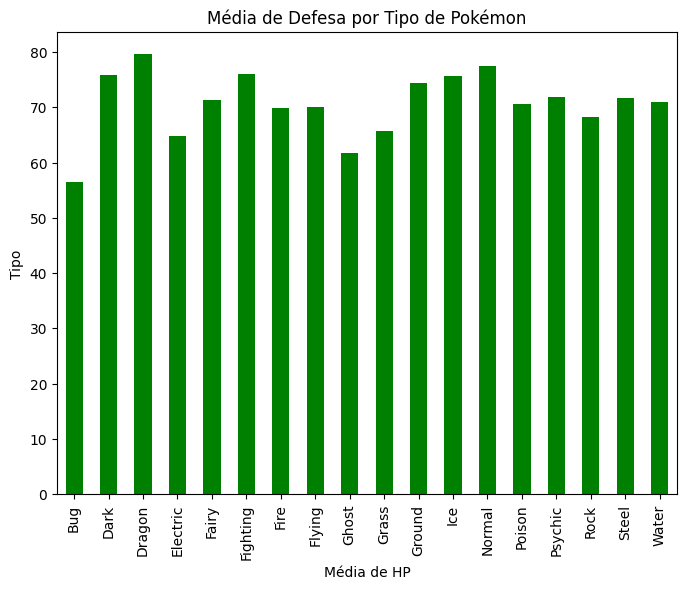

In [ ]:
#grafico de barras de hp
hp_by_type = df.groupby("type1")["hp"].mean()

hp_by_type.plot(kind="bar", figsize=(8,6), color="green")
plt.xlabel("Média de HP")
plt.ylabel("Tipo")
plt.title("Média de Defesa por Tipo de Pokémon")
plt.show()

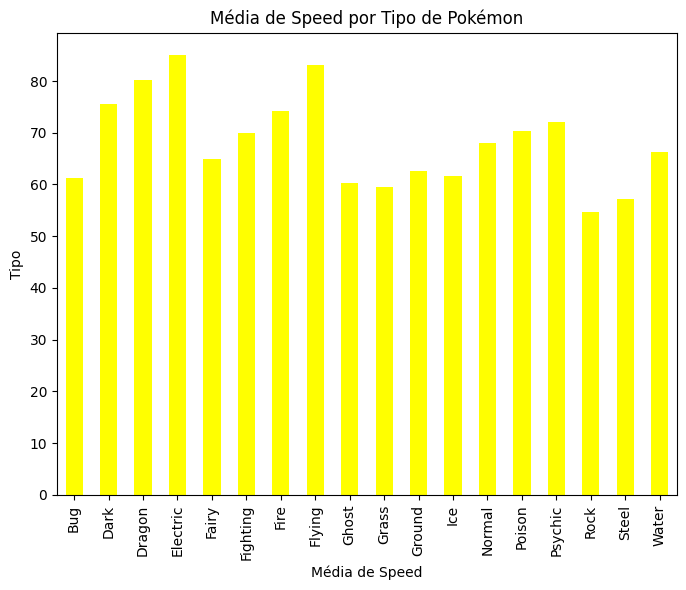

In [ ]:
#grafico de barras de hp
hp_by_type = df.groupby("type1")["speed"].mean()

hp_by_type.plot(kind="bar", figsize=(8,6), color="yellow")
plt.xlabel("Média de Speed")
plt.ylabel("Tipo")
plt.title("Média de Speed por Tipo de Pokémon")
plt.show()

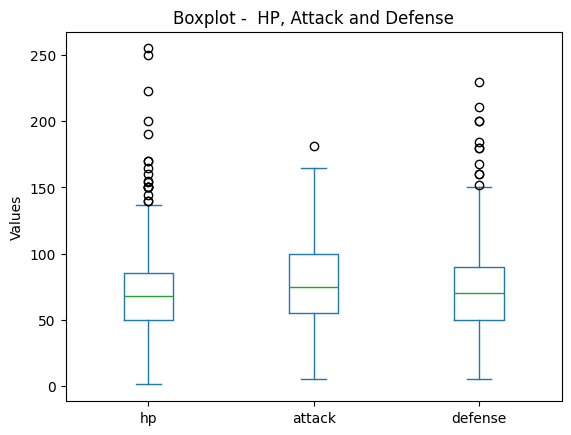

In [ ]:
#boxplot
df[['hp', 'attack', 'defense']].plot(kind='box')
plt.title('Boxplot -  HP, Attack and Defense')
plt.ylabel('Values')
plt.show() 

<function matplotlib.pyplot.show(close=None, block=None)>

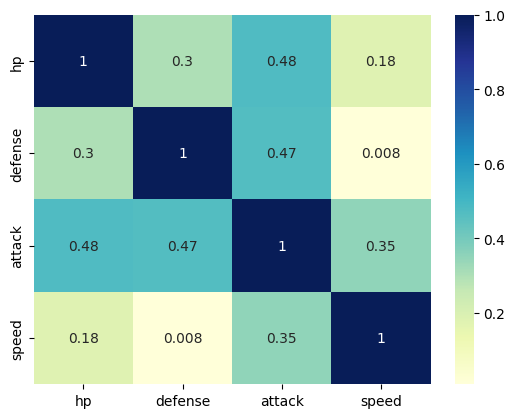

In [ ]:
sns.heatmap(df[["hp", "defense", "attack", "speed"]].corr(), annot=True, cmap="YlGnBu")
plt.show

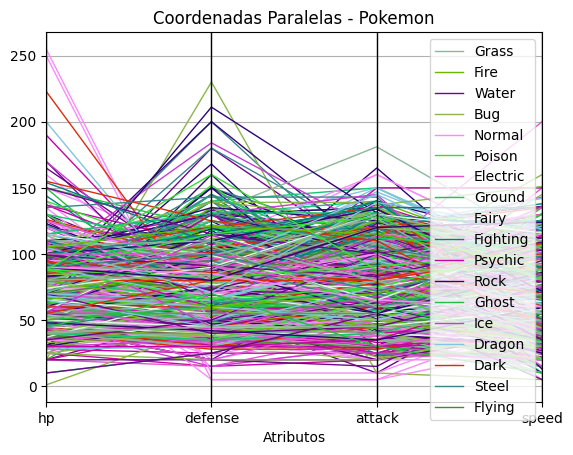

In [ ]:
#coordenadas paralelas
parallel_coordinates(df[["hp", "defense", "attack", "speed", "type1"]], "type1", linewidth=1.0)
plt.title('Coordenadas Paralelas - Pokemon')
plt.xlabel('Atributos')
plt.show()

## Predição de Tipo Impraticável, tentando outro dataset

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


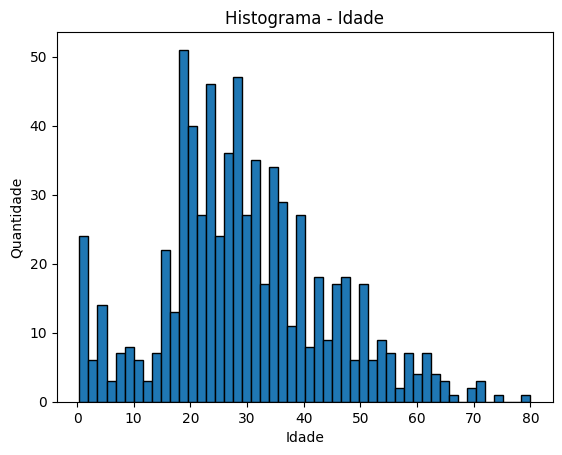

In [ ]:
#histograma de passageiros por idade
plt.figure()
df['Age'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Histograma - Idade') 
plt.xlabel('Idade') 
plt.ylabel('Quantidade') 
plt.show() 

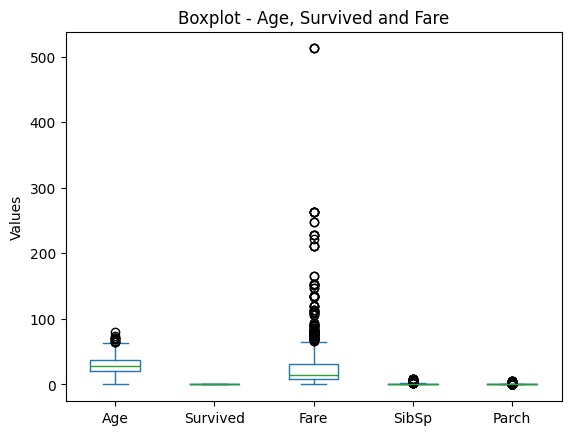

In [ ]:
#boxplot
df[['Age', 'Survived', 'Fare', 'SibSp', 'Parch']].plot(kind='box')
plt.title('Boxplot - Age, Survived and Fare')
plt.ylabel('Values')
plt.show() 

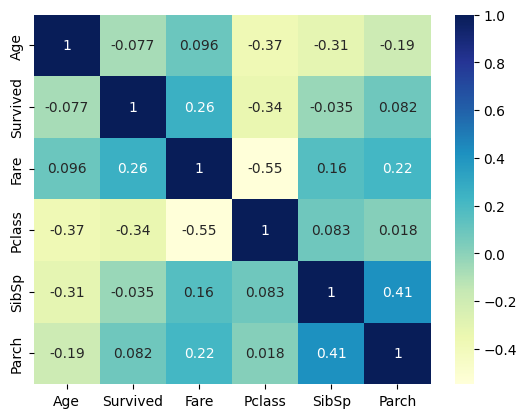

In [ ]:
sns.heatmap(df[['Age', 'Survived', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr(), annot=True, cmap='YlGnBu')
plt.show()

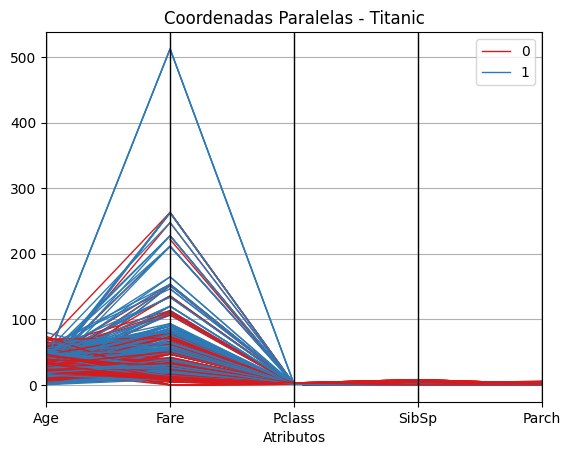

In [ ]:
parallel_coordinates(df[['Age', 'Survived', 'Fare', 'Pclass', 'SibSp', 'Parch']], 'Survived', linewidth=1.0, color=['#d7191c', '#2c7bb6'])
plt.title('Coordenadas Paralelas - Titanic')
plt.xlabel('Atributos')
plt.show()

In [ ]:
x = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
y = df["Survived"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f'Treino: {x_train.shape} | Teste: {x_test.shape}')
print(f'Treino: {y_train.shape} | Teste: {y_test.shape}')

Treino: (712, 5) | Teste: (179, 5)
Treino: (712,) | Teste: (179,)


In [ ]:
x_scaled

array([[-0.53037664, -0.50244517,  0.82737724,  0.43279337, -0.47367361],
       [ 0.57183099,  0.78684529, -1.56610693,  0.43279337, -0.47367361],
       [-0.25482473, -0.48885426,  0.82737724, -0.4745452 , -0.47367361],
       ...,
       [        nan, -0.17626324,  0.82737724,  0.43279337,  2.00893337],
       [-0.25482473, -0.04438104, -1.56610693, -0.4745452 , -0.47367361],
       [ 0.15850313, -0.49237783,  0.82737724, -0.4745452 , -0.47367361]],
      shape=(891, 5))

In [ ]:
rf = RandomForestClassifier(n_estimators=300)

#treino
rf.fit(x_train, y_train)

#predição
y_pred_rf = rf.predict(x_test)

#métricas
print('Acurácia: ', round(accuracy_score(y_test, y_pred_rf), 4))
print('\nRelatório de classificação:')
print(classification_report(y_test, y_pred_rf))

Acurácia:  0.6425

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       110
           1       0.53      0.57      0.55        69

    accuracy                           0.64       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.65      0.64      0.64       179



## Modelo Para Deferenciar Pokemon e Remédio pelo nome

In [288]:
df_pokemon = pd.read_csv("pokemon_dataset.csv")
df_medicine = pd.read_csv("medicine_dataset.csv")

df = pd.concat([df_pokemon, df_medicine])

In [289]:
df

,isPokemon,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,1,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3.0,VenusaurMega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4.0,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0,NaN,Acetomycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antidiabetic,Tablet,200 mg,Bayer AG,Diabetes,Over-the-Counter
1042,0,NaN,Dolonazole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antipyretic,Injection,254 mg,Pfizer Inc.,Virus,Prescription
1043,0,NaN,Ibuprovir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Analgesic,Injection,998 mg,Biogen Inc.,Wound,Prescription
1044,0,NaN,Dextromycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antibiotic,Inhaler,440 mg,AbbVie Inc.,Depression,Prescription


In [291]:
x = df['Name']
y = df['isPokemon']

vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.20, random_state=42, stratify=y)

#printando o resultado dessa divisão
print(f'Treino: {x_train.shape} | Teste: {x_test.shape}')
print(f'Treino: {y_train.shape} | Teste: {y_test.shape}')

Treino: (1476, 869) | Teste: (370, 869)
Treino: (1476,) | Teste: (370,)


In [292]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1564 stored elements and shape (1476, 869)>

In [293]:
nb = MultinomialNB()

#treino
nb.fit(x_train, y_train)

#predição
y_pred_nb = nb.predict(x_test)

#métricas
print('Acurácia: ', round(accuracy_score(y_test, y_pred_nb), 4))
print('\nMatriz de confusão:')

print(classification_report(y_test, y_pred_nb))

Acurácia:  0.6243

Matriz de confusão:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       210
           1       1.00      0.13      0.23       160

    accuracy                           0.62       370
   macro avg       0.80      0.57      0.49       370
weighted avg       0.77      0.62      0.53       370

